# K Nearest Neighbors Project 
**By Harshit Gola**


Since this data is artificial, our goal is predict Target Class using KNN Aproach.

## Importing Libraries

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the Data


In [69]:
df=pd.read_csv("KNN_Project_Data")

**Check the head of the dataframe.**

In [70]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA



**Using seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


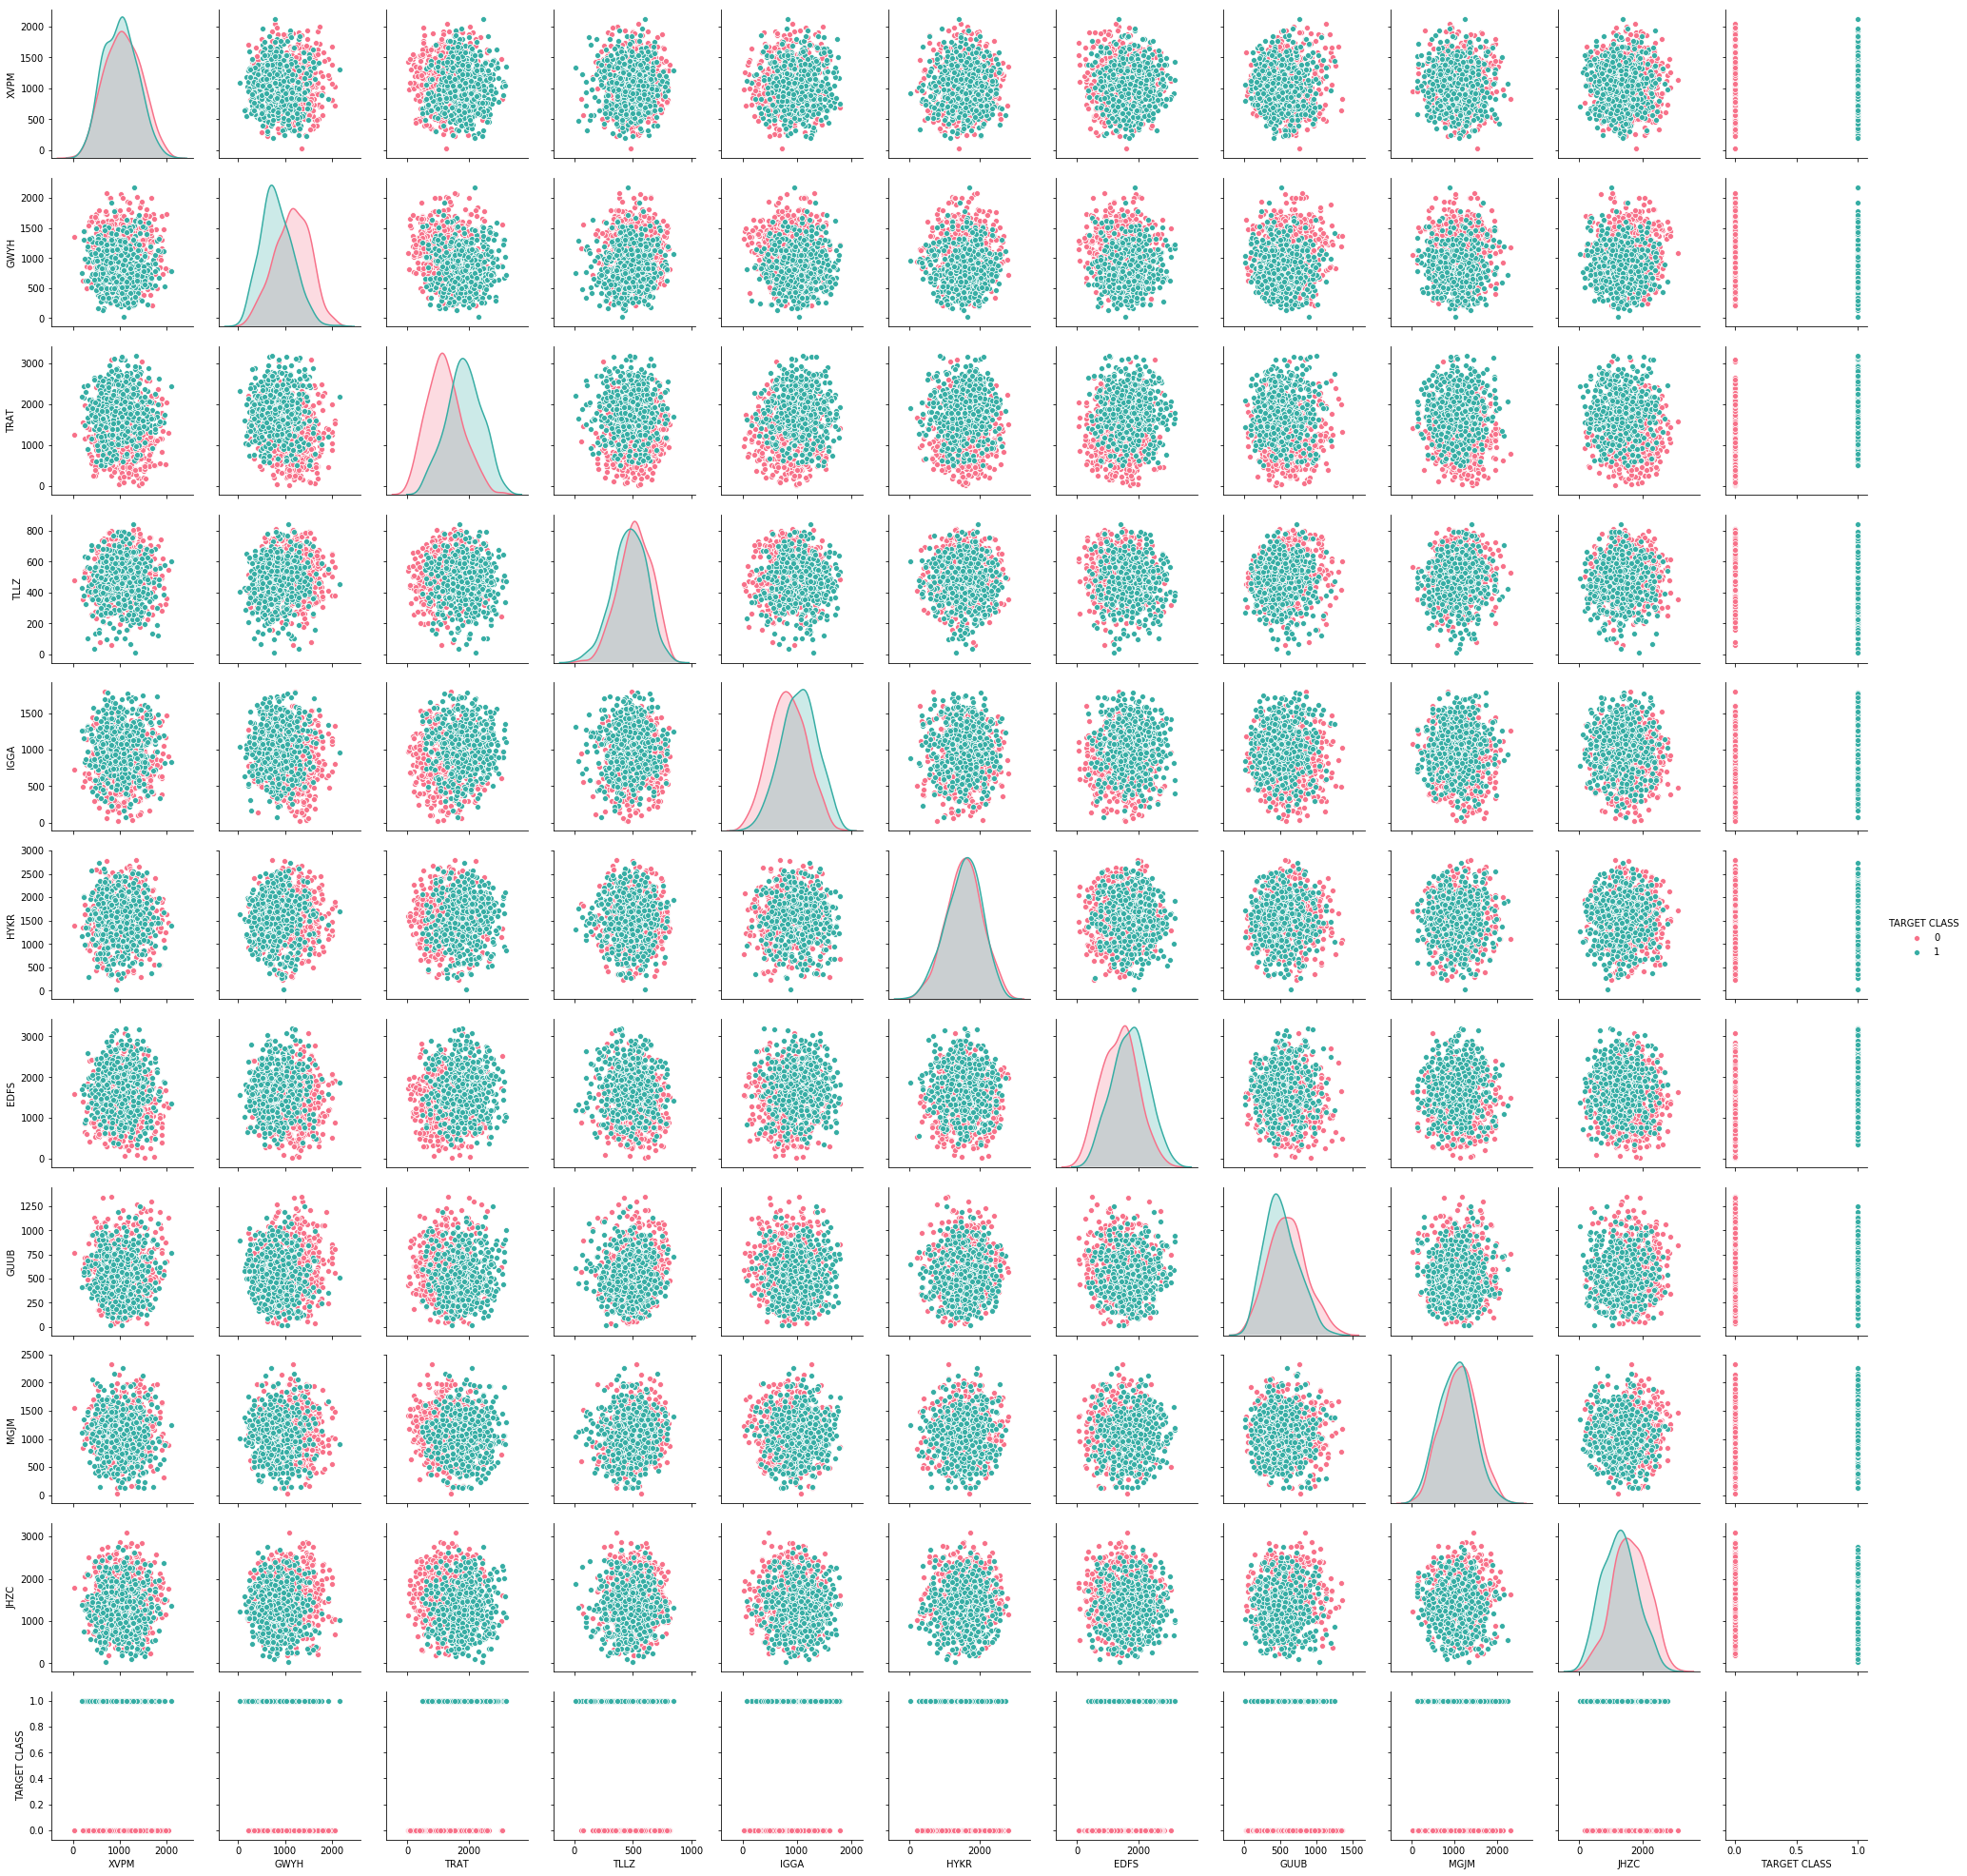

In [71]:
sns.pairplot(df, hue='TARGET CLASS', palette ='husl')

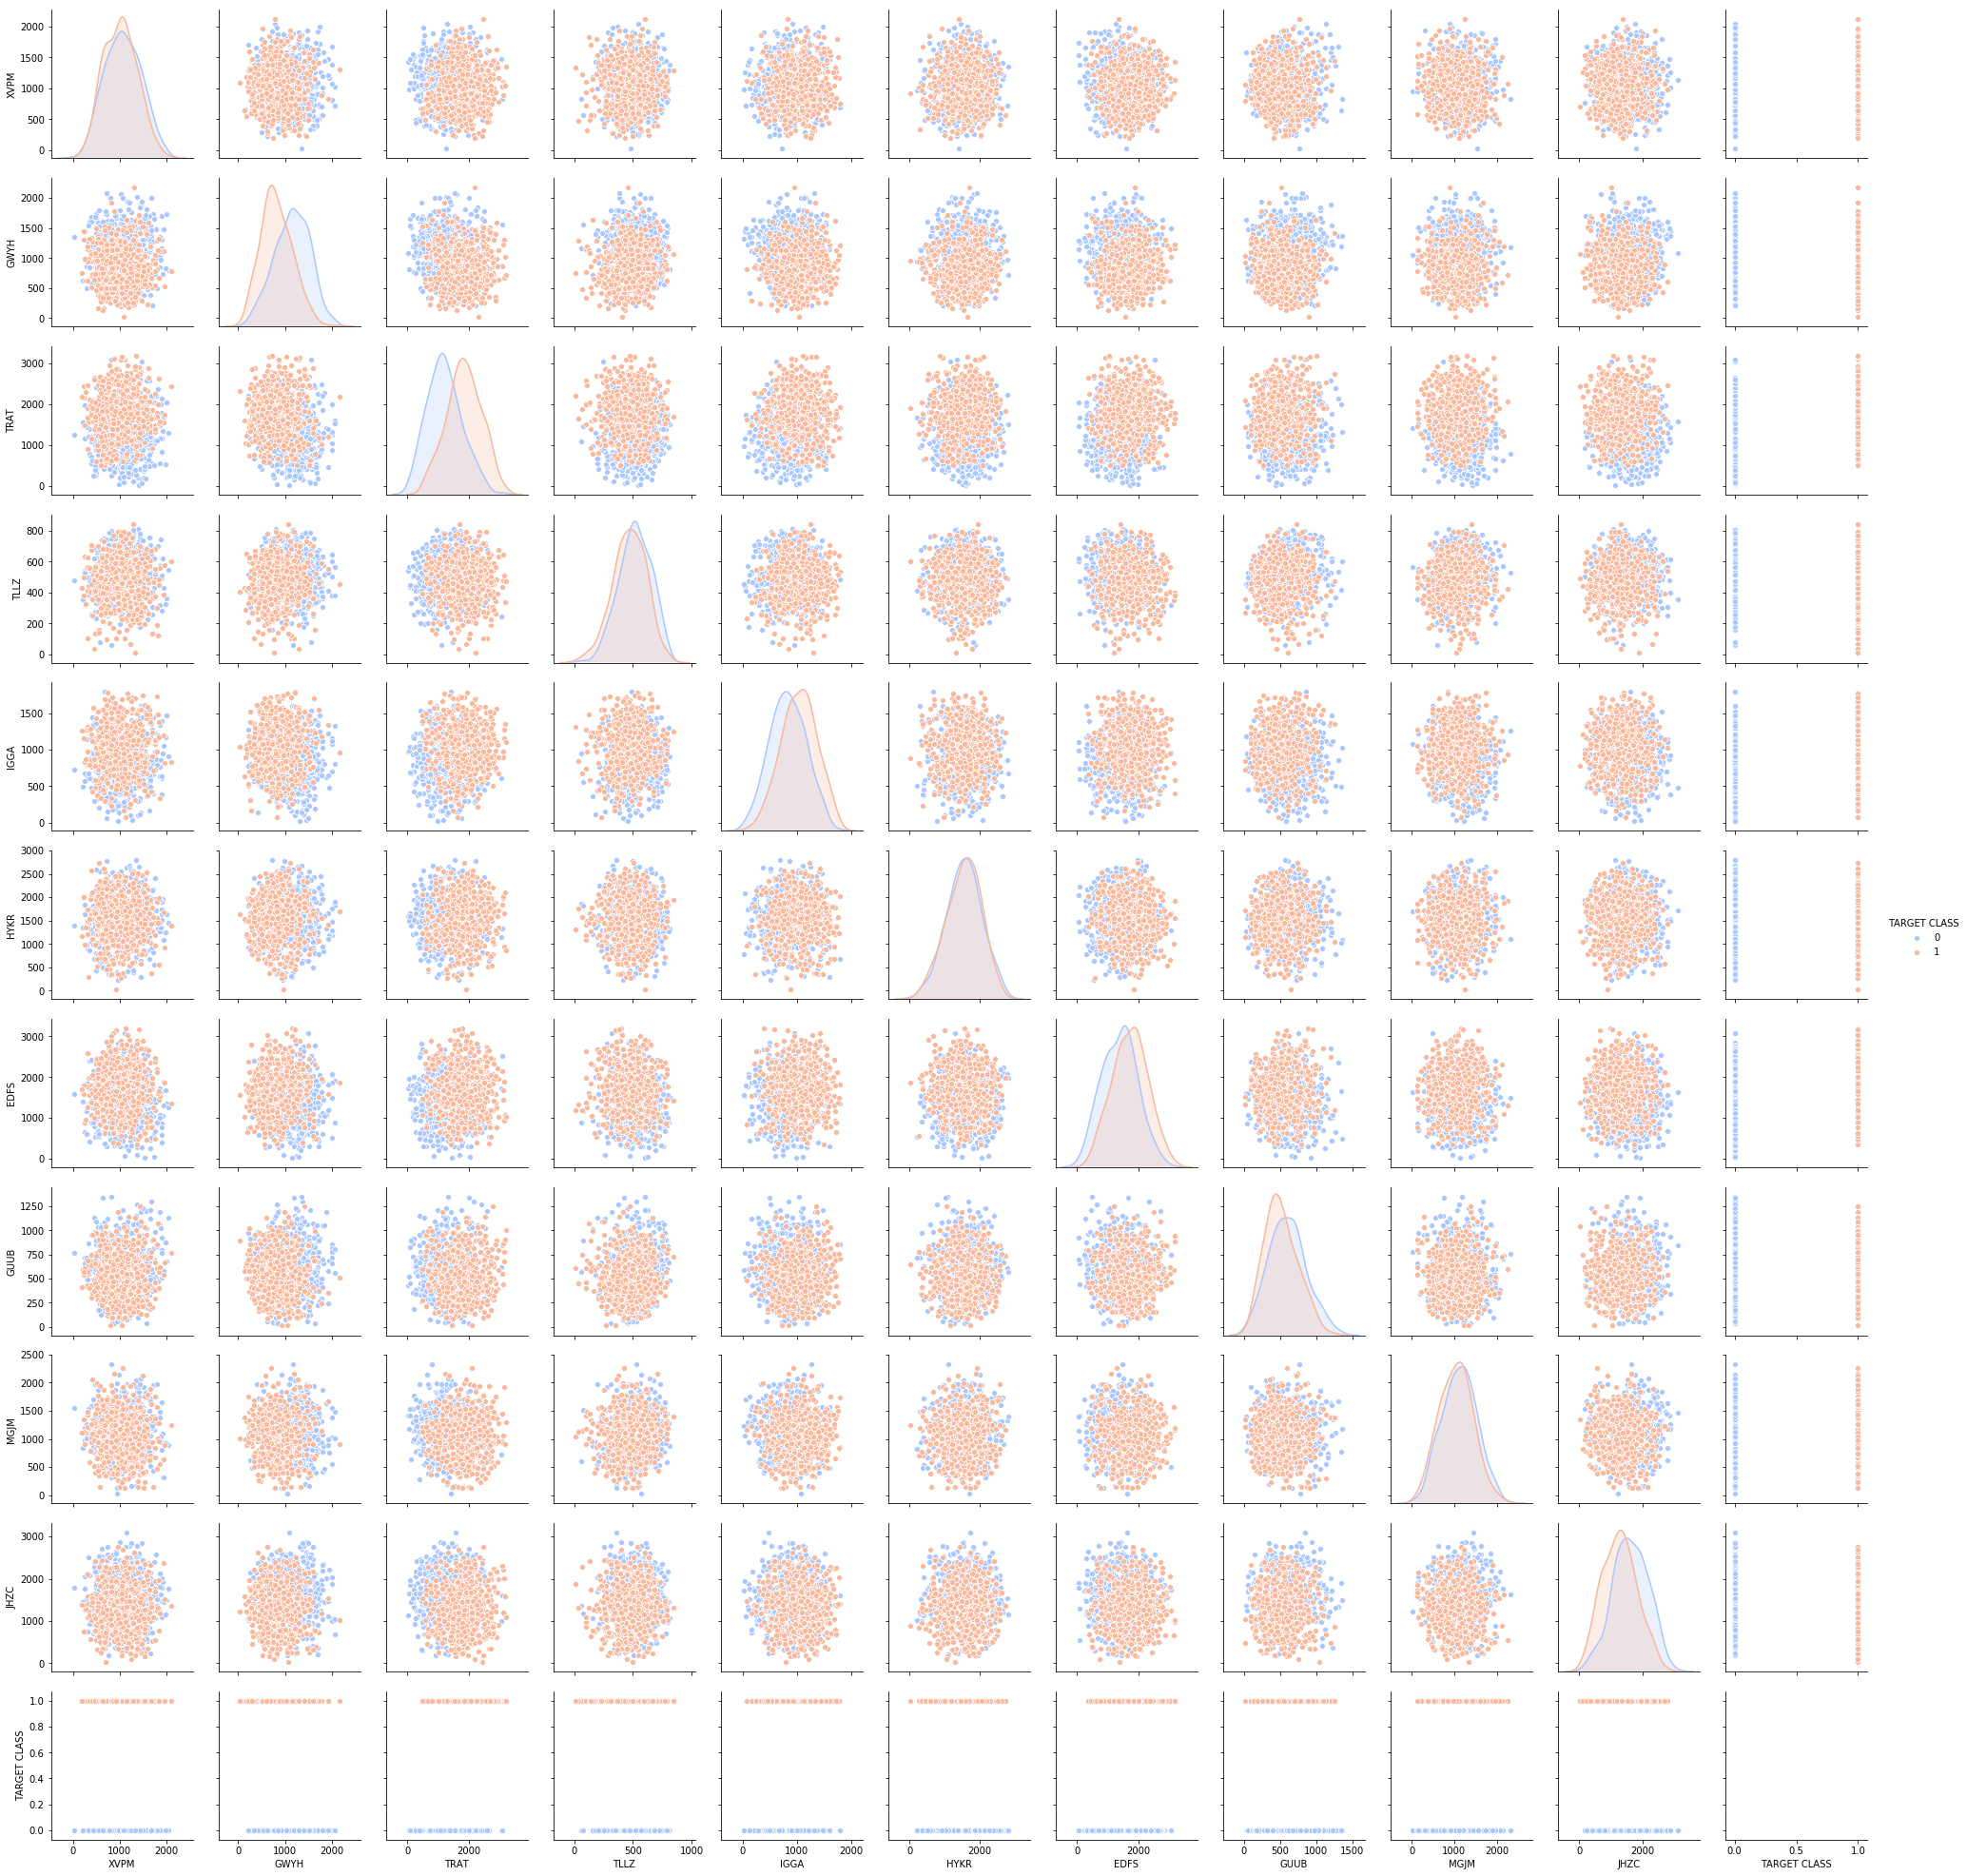

In [72]:
sns.pairplot(df,hue='TARGET CLASS', palette='coolwarm')

# Standardize the Variables

Standardizing the variables.

** Import StandardScaler from Scikit learn.**

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
from sklearn.preprocessing import StandardScaler

** Creating a StandardScaler() object called scaler.**

In [75]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [76]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Using the .transform() method to transform the features to a scaled version.**

In [77]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Converting the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [78]:
scaled_df = pd.DataFrame(scaled_features)
scaled_df.columns = df.columns[:-1]
scaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Using train_test_split to split your data into a training set and a testing set.**

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X=scaled_features
y=df['TARGET CLASS']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Using KNN

**Importing KNeighborsClassifier from scikit learn.**

In [102]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with n_neighbors=1**

In [103]:
knn=KNeighborsClassifier(n_neighbors=3)

**Fitting this KNN model to the training data.**

In [104]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Using the predict method to predict values using your KNN model and X_test.**

In [105]:
predictions=knn.predict(X_test)

** Creating a confusion matrix and classification report.**

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
print('\n Confusion Matrix: \n', confusion_matrix(y_test, predictions))


 Confusion Matrix: 
 [[117  35]
 [ 30 118]]


In [108]:
print('\n Classification Report: \n', classification_report(y_test, predictions))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       152
           1       0.77      0.80      0.78       148

   micro avg       0.78      0.78      0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



# Choosing a K Value
Using the elbow method to pick a good K Value!

** Creating a for loop that trains various KNN models with different k values, 
then keep track of the error_rate for each of these models with a list. **

In [109]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

**Now creating the plot to see Error Rate

Text(0, 0.5, 'Error Rate')

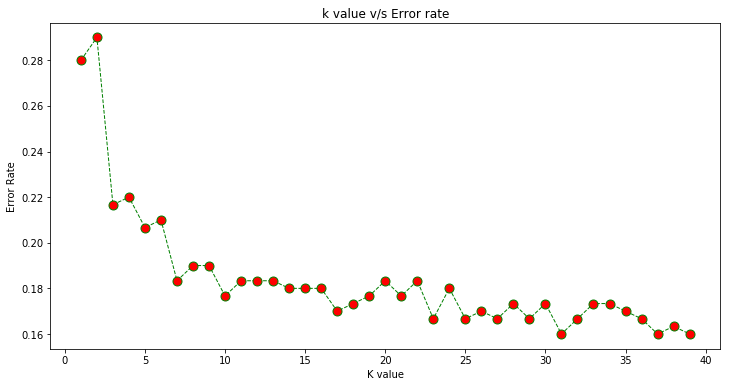

In [110]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='green', marker='o', linestyle='dashed', linewidth=1, 
         markerfacecolor='red', markersize=9)
plt.title('k value v/s Error rate')
plt.xlabel('K value')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retraining the model with the best K value**

In [111]:
knn_newk=KNeighborsClassifier(n_neighbors=30)
knn_newk.fit(X_train, y_train)
predictions_newk=knn_newk.predict(X_test)


In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix: \n', confusion_matrix(y_test, predictions_newk))
print('\n\n Classification Report: \n', classification_report(y_test, predictions_newk))

Confusion matrix: 
 [[124  28]
 [ 24 124]]


 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

